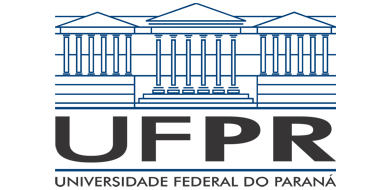
### <center>  Especialização em Inteligência Artificial Aplicada

### NOMES: 	
ANA PAULA CARNEIRO SCHMECHEL VALLEJOS  
ANDRE APARECIDO DA SILVA  
DANIELA ALEIXO DIAS  
ELIAS SANDRO SCHMECHEL VALLEJOS  
TIAGO JOSE DA SILVA  


## <center>  TRABALHO DA DISCIPLINA 
<center> Prof. Dr. Razer Anthom Nizer Rojas Montaño  


# 1 Pesquisa com Dados de Satélite (Satellite)

O banco de dados consiste nos valores multi-espectrais de pixels em vizinhanças 3x3 em uma imagem de satélite, e na classificação associada ao pixel central em cada vizinhança. O objetivo é prever esta classificação, dados os valores multi-espectrais.

Um quadro de imagens do Satélite Landsat com MSS (Multispectral Scanner System) consiste em quatro imagens digitais da mesma cena em diferentes bandas espectrais. Duas delas estão na região visível (correspondendo aproximadamente às regiões verde e vermelha do espectro visível) e duas no infravermelho (próximo). Cada pixel é uma palavra binária de 8 bits, com 0 correspondendo a preto e 255 a branco. A resolução espacial de um pixel é de cerca de 80m x 80m. Cada imagem contém 2340 x 3380 desses pixels. O banco de dados é uma subárea (minúscula) de uma cena, consistindo de 82 x 100 pixels. Cada linha de dados corresponde a uma vizinhança quadrada de pixels 3x3 completamente contida dentro da subárea 82x100. Cada linha contém os valores de pixel nas quatro bandas espectrais (convertidas em ASCII) de cada um dos 9 pixels na vizinhança de 3x3 e um número indicando o rótulo de classificação do pixel central.

As classes são: solo vermelho, colheita de algodão, solo cinza, solo cinza úmido, restolho de vegetação, solo cinza muito úmido.

Os dados estão em ordem aleatória e certas linhas de dados foram removidas, portanto você não pode reconstruir a imagem original desse conjunto de dados. Em cada linha de dados, os quatro valores espectrais para o pixel superior esquerdo são dados primeiro, seguidos pelos quatro valores espectrais para o pixel superior central e, em seguida, para o pixel superior direito, e assim por diante, com os pixels lidos em sequência, da esquerda para a direita e de cima para baixo. Assim, os quatro valores espectrais para o pixel central são dados pelos atributos 17, 18, 19 e 20. Se você quiser, pode usar apenas esses quatro atributos, ignorando os outros. Isso evita o problema que surge quando uma vizinhança 3x3 atravessa um limite.

O banco de dados se encontra no pacote **mlbench** e é completo (não possui dados faltantes).

**Tarefas** 

1. Treine modelos RandomForest, SVM e RNA para predição destes dados. 
2. Escolha o melhor modelo com base em suas matrizes de confusão. 
3. Treine o modelo final com todos os dados e faça a predição na base completa. 
4. Analise o resultado.
5. Salve este modelo final 

## Solução

Antes de começarmos precisamos carregar as bibliotecas necessárias para esse exercício:

In [2]:
install.packages('mlbench')
install.packages("kernlab")
install.packages("e1071")
install.packages("randomForest")
install.packages("kernlab")
install.packages("caret")

library(mlbench)
library(caret)
library(e1071)
library(kernlab)

### Análise de dados

- Carrega os dados

In [5]:
data(Satellite)
df <- Satellite[c(17:20, 37)]

In [6]:
# conta o número de linhas
numRows <- nrow(df)

- Particiona os dados em 80% para treinamento e 20% para testes

In [7]:
# seta o seed para que seja possível reproduzir
set.seed(1) 

In [8]:
# gera lista randômica de números 
indexes <- createDataPartition(df$classes, p = 0.80, list = FALSE)  

In [9]:
# dataframes de treino e teste
df.train <- df[indexes,]
df.test  <- df[-indexes,]

----

### Treinamento de modelos

- Random Forest

In [10]:
set.seed(1) 
model.rf <- train(classes~., 
                  data=df.train, 
                  method="rf",
                  trControl = trainControl("cv", number = 10),
                  preProcess = c("center","scale")
)
predicted.rf <- predict(model.rf, df.test)
cm.rf <- confusionMatrix(data=predicted.rf, reference = df.test$classes)
cm.rf #Accuracy: 0.8442 

Confusion Matrix and Statistics

                     Reference
Prediction            red soil cotton crop grey soil damp grey soil
  red soil                 301           0         5              3
  cotton crop                0         123         0              1
  grey soil                  1           0       236             24
  damp grey soil             0           1        19             64
  vegetation stubble         4          13         1              1
  very damp grey soil        0           3        10             32
                     Reference
Prediction            vegetation stubble very damp grey soil
  red soil                            12                   0
  cotton crop                          4                   1
  grey soil                            1                   7
  damp grey soil                       1                  34
  vegetation stubble                 110                   9
  very damp grey soil                 13                 250

O

- SVM

In [11]:
set.seed(1) 
model.svm <- train(classes~., 
                   data=df.train, 
                   method="svmRadial",
                   trControl = trainControl("cv", number = 10),
                   preProcess = c("center","scale")
)
predicted.svm <-predict(model.svm, df.test)
cm.svm <- confusionMatrix(data=predicted.svm, reference = df.test$classes)
cm.svm #Accuracy: 0.8567  

Confusion Matrix and Statistics

                     Reference
Prediction            red soil cotton crop grey soil damp grey soil
  red soil                 303           1         5              2
  cotton crop                0         121         0              0
  grey soil                  1           0       252             25
  damp grey soil             0           0        12             72
  vegetation stubble         2          13         0              1
  very damp grey soil        0           5         2             25
                     Reference
Prediction            vegetation stubble very damp grey soil
  red soil                            14                   0
  cotton crop                          1                   0
  grey soil                            1                  12
  damp grey soil                       2                  33
  vegetation stubble                 101                   5
  very damp grey soil                 22                 251

O

- RNA

In [12]:
set.seed(1) 
model.rna <- train(classes~., 
                   data=df.train, 
                   method="nnet",
                   trControl = trainControl("cv", number = 10),
                   preProcess = c("center","scale"), 
                   trace=FALSE
)
predicted.rna <-predict(model.rna, df.test)
cm.rna <- confusionMatrix(data=predicted.rna, reference = df.test$classes)
cm.rna #Accuracy: 0.8544

Confusion Matrix and Statistics

                     Reference
Prediction            red soil cotton crop grey soil damp grey soil
  red soil                 302           0         7              3
  cotton crop                0         124         0              1
  grey soil                  1           0       245             24
  damp grey soil             0           0        15             71
  vegetation stubble         3          12         1              1
  very damp grey soil        0           4         3             25
                     Reference
Prediction            vegetation stubble very damp grey soil
  red soil                            14                   0
  cotton crop                          5                   1
  grey soil                            1                  11
  damp grey soil                       1                  31
  vegetation stubble                 104                   7
  very damp grey soil                 16                 251

O

------

### Análise de resultados

In [13]:
data.frame('Modelo' = c('Random Forest', 'SVM', 'RNA'), 'Acurácia' =  c(
    cm.rf$overall['Accuracy'],
    cm.svm$overall['Accuracy'],
    cm.rna$overall['Accuracy'] ))

Modelo,Acurácia
Random Forest,0.8442368
SVM,0.8566978
RNA,0.8543614


A partir das predicões feitas é possível afirmar que o modelo baseado em SVM se destaca por possuir maior acurácia (0.8566978).

----

### Geração do modelo final

- Obtém dados do melhor modelo

In [15]:
model.svm

Support Vector Machines with Radial Basis Function Kernel 

5151 samples
   4 predictor
   6 classes: 'red soil', 'cotton crop', 'grey soil', 'damp grey soil', 'vegetation stubble', 'very damp grey soil' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4638, 4635, 4635, 4635, 4635, 4635, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8598395  0.8261975
  0.50  0.8635274  0.8308060
  1.00  0.8635206  0.8308518

Tuning parameter 'sigma' was held constant at a value of 0.9749486
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.9749486 and C = 0.5.

- A partir dos parâmetros C = 0.5 e Sigma = 0.9749486 gera-se o modelo final

In [16]:
model.final <- ksvm(type="C-svc", classes~., data=Satellite, kernel="rbfdot",
                    C=0.5, kpar=list(sigma=0.9749486))
predicted.final <- predict(model.final, Satellite)

cm.final <- confusionMatrix(predicted.final, Satellite$classes)
cm.final

Confusion Matrix and Statistics

                     Reference
Prediction            red soil cotton crop grey soil damp grey soil
  red soil                1533           0         2             60
  cotton crop                0         703         0              0
  grey soil                  0           0      1346             89
  damp grey soil             0           0         8            400
  vegetation stubble         0           0         0              1
  very damp grey soil        0           0         2             76
                     Reference
Prediction            vegetation stubble very damp grey soil
  red soil                             3                   0
  cotton crop                          0                   0
  grey soil                            0                  10
  damp grey soil                       0                   6
  vegetation stubble                 701                   1
  very damp grey soil                  3                1491

O

- Salva o modelo final

In [17]:
saveRDS(model.final, "satellite_svm.rds")

-----

# 2 Estimativa de volumes de árvores

Modelos de aprendizado de máquina são bastante usados na área da engenharia florestal (mensuração florestal) para, por exemplo, estimar o volume de madeira de árvores sem ser necessário abatê-las.

O processo é feito pela coleta de dados (dados observados) através do abate de algumas árvores, onde sua altura, diâmetro na altura do peito (dap), etc, são medidos de forma exata. Com estes dados, treina-se um modelo de AM que pode estimar o volume de outras árvores da população.

Os modelos, chamados **alométricos**, são usados na área há muitos anos e são baseados em regressão (linear ou não) para encontrar uma equação que descreve os dados. Por exemplo, o modelo de Spurr é dado por:

$$Volume = b_0 + b_1 * dap ^ 2 * H_t$$

Onde **dap** é o diâmetro na altura do peito (1,3 metros), $H_t$ é a altura total. Tem-se vários modelos alométricos, cada um com uma determinada característica, parâmetros, etc. Um modelo de regressão envolve aplicar os dados observados e encontrar $b_0$ e $b_1$ no modelo apresentado, gerando assim uma equação que pode ser usada para prever o volume de outras árvores.

Dado o arquivo **Volumes.csv**, que contém os dados de observação, escolha um modelo de aprendizado de máquina com a melhor estimativa, a partir da estatística de correlação.

**Tarefas**

1. Carregar o arquivo Volumes.csv (http://www.razer.net.br/datasets/Volumes.csv)

2. Eliminar a coluna NR, que só apresenta um número sequencial

3. Criar partição de dados: treinamento 80%, teste 20%

4. Usando o pacote "caret", treinar os modelos: Random Forest (rf), SVM (svmRadial), Redes Neurais (neuralnet) e o modelo alométrico de SPURR

5. O modelo alométrico é dado por: Volume = $b_0$ + $b_1$ * $dap ^2$ * $H_t$

6. Efetue as predições nos dados de teste

7. Crie funções e calcule as seguintes métricas entre a predição e os dados observados

- Coeficiente de determinação: $R^2$

    $$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \widehat{y_i})^2}{\sum_{i=1}^n (y_i - \overline{y} )^2}$$

    Onde $y_i$ é o valor observado, $\widehat{y_i}$ é o valor predito e $\overline{y}$ é a média dos valores $y_i$ observados. Quanto mais perto de 1 melhor é o modelo;
    
- Erro padrão da estimativa: $S_{yx}$

    $$S_{yx} = \sqrt{\frac{\sum_{i=1}^n (y_i - \widehat{y_i})^2}{n - 2}}$$

    Esta métrica indica erro, portanto quanto mais perto de 0 melhor é o modelo;
    
- $S_{yx}$%:

    $$S_{yx}\% = \frac{S_{xy}}{\overline{y}} * 100$$

    Esta métrica indica porcentagem de erro, portanto quanto mais perto de 0 melhor é o modelo;

8. Escolha o melhor modelo

## Solução

Antes de começarmos precisamos carregar as bibliotecas necessárias para esse exercício:

In [ ]:
# install.packages("kernlab")
# install.packages("e1071")
# install.packages("randomForest")
# install.packages("kernlab")
# install.packages("caret")

library("caret")

### Análise de dados

- Carrega os dados

In [18]:
dataset <- read.csv('http://www.razer.net.br/datasets/Volumes.csv', header = TRUE, sep = ';', dec = ',')

In [19]:
head(dataset)

NR,DAP,HT,HP,VOL
1,34.0,27.00,1.80,0.8971441
2,41.5,27.95,2.75,1.6204441
3,29.6,26.35,1.15,0.8008181
4,34.3,27.15,1.95,1.0791682
5,34.5,26.20,1.00,0.9801112
6,29.9,27.10,1.90,0.9067022


- Remove a coluna NR do dataset

In [20]:
dataset <- dataset[-1]

In [21]:
head(dataset)

DAP,HT,HP,VOL
34.0,27.00,1.80,0.8971441
41.5,27.95,2.75,1.6204441
29.6,26.35,1.15,0.8008181
34.3,27.15,1.95,1.0791682
34.5,26.20,1.00,0.9801112
29.9,27.10,1.90,0.9067022


----

### Particionamento

- Particiona os dados em 80% para treinamento e 20% para testes

In [22]:
set.seed(1)
indexes <- createDataPartition(dataset$VOL, p = 0.80, list = FALSE)

In [23]:
dataset.train <- dataset[indexes,]
dataset.test <- dataset[-indexes,]

-----

### Treinamento de modelos

- Random Forest

In [25]:
set.seed(1)
model.rf <- train(VOL ~., data = dataset.train, method = 'rf',
                  trControl = trainControl('cv', number = 10), preProcess = c('center', 'scale'))

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



- Svm

In [26]:
set.seed(1)
model.svm <- train(VOL ~., data = dataset.train, method = 'svmRadial',
                  trControl = trainControl('cv', number = 10), preProcess = c('center', 'scale'))

- Redes neurais

In [27]:
set.seed(1)
model.neural <- train(VOL ~ ., data = dataset.train, method = 'neuralnet', linear.output = TRUE, threshold = 0.1,
                  trControl = trainControl('cv', number = 10), preProcess = c('center', 'scale'))

- Modelo alométrico de SPURR

In [28]:
set.seed(1)
model.alom <- nls(VOL ~ b0 + b1 * DAP ^ 2 * HT, dataset.train, start = list(b0 = 0.5, b1 = 0.5))

-----

### Predições

In [29]:
predictions.rf <- predict(model.rf, dataset.test)

In [30]:
predictions.svm <- predict(model.svm, dataset.test)

In [31]:
predictions.neural <- predict(model.neural, dataset.test)

In [32]:
predictions.alom <- predict(model.alom, dataset.test)

-----

### Métricas

- Cria funções para cálculo de $R^2$, $S_{yx}$ e $S_{yx}\%$

In [33]:
functions.r2 <- function(observations, predictions) {
    return (1 - (sum((observations - predictions) ^ 2) / sum((observations - mean(observations)) ^ 2)))
}

functions.syx <- function(observations, predictions) {
    return (sqrt((sum((observations - predictions) ^ 2) / (length(observations) - 2))))
}

functions.syx_percent <- function(observations, predictions) {
    return (functions.syx(observations, predictions) / mean(observations) * 100)
}

- Métricas para Rando Forest

In [34]:
metrics.rf_r2 <- functions.r2(dataset.test$VOL, predictions.rf)
metrics.rf_syx <- functions.syx(dataset.test$VOL, predictions.rf)
metrics.rf_syx_percent <- functions.syx_percent(dataset.test$VOL, predictions.rf)

- Métricas para SVM

In [35]:
metrics.svm_r2 <- functions.r2(dataset.test$VOL, predictions.svm)
metrics.svm_syx <- functions.syx(dataset.test$VOL, predictions.svm)
metrics.svm_syx_percent <- functions.syx_percent(dataset.test$VOL, predictions.svm)

- Métricas para Neural Network

In [36]:
metrics.neural_r2 <- functions.r2(dataset.test$VOL, predictions.neural)
metrics.neural_syx <- functions.syx(dataset.test$VOL, predictions.neural)
metrics.neural_syx_percent <- functions.syx_percent(dataset.test$VOL, predictions.neural)

- Métricas para o modelo alométrico de Spurr

In [37]:
metrics.alom_r2 <- functions.r2(dataset.test$VOL, predictions.alom)
metrics.alom_syx <- functions.syx(dataset.test$VOL, predictions.alom)
metrics.alom_syx_percent <- functions.syx_percent(dataset.test$VOL, predictions.alom)

-----

### Análise de resultados e conclusão

- Resultado consolidado

In [38]:
data.frame('Random Forest' = c(metrics.rf_r2, metrics.rf_syx, metrics.rf_syx_percent),
           'SVM' = c(metrics.svm_r2, metrics.svm_syx, metrics.svm_syx_percent),
           'Neural Network' = c(metrics.neural_r2, metrics.neural_syx, metrics.neural_syx_percent),
           'Alometric Model' = c(metrics.alom_r2, metrics.alom_syx, metrics.alom_syx_percent), 
           row.names = c('R2', 'Syx','Sxy%'))

,Random.Forest,SVM,Neural.Network,Alometric.Model
R2,0.8159382,0.8471655,0.8666900,0.8328804
Syx,0.1813625,0.1652633,0.1543466,0.1728142
Sxy%,13.0543030,11.8954979,11.1097235,12.4390013


Baseado no nas estatísticas $R^2$, $S_{yx}$ e $S_{yx}\%$, é possível concluir que o melhor modelo treinado é o modelo baseado em redes neurais (Neural Network) pois o mesmo possui a a maior taxa $R^2$ e a menor taxa $S_{yx}$